# Interview Task: House Price Prediction Model

For the start, I was given the dataset of house prices alongside with different features that can influence the price of a house.

The task is to build and train a model that will predict the price of a house based on a set of given features.

First step is to take a look at the given dataset, understand them and try to make some assumptions based on previous real-life experience and knowledge received from a brief look of the data I have.

In [396]:
# Import of the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use('default')
# plt.style.use('seaborn-v0_8-muted')
# plt.style.use({'figure.facecolor': 'white'})
import seaborn as sns
sns.set_style('whitegrid')

## Step 1: Load the dataset
For this step, I downloaded the dataset from Kagglehub (https://www.kaggle.com/ahmednour/house-price-prediction). In order to efficiently read the dataset, I used the pandas library, specifically the method "read_csv()", that will read the contents of the dataset and store it in a pandas DataFrame.

In [397]:
dataset = pd.read_csv('./dataset/house_price_dataset.csv')

## Step 2: Display the dataset

After I read the CSV dataset, I need to have some insights into what data is contained inside of it. For that purpose, I will use dataframes extensive methods to display the dataset, its description and useful information about it.

In [398]:
print("Step 2: Display the dataset (first 10 rows and last 10 rows)")


# display - method from IPython library that will display the given argument in a more pleasant way
display(dataset.head(10))
display(dataset.tail(10))

Step 2: Display the dataset (first 10 rows and last 10 rows)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


## Step 3: Analyze the dataset

As it may be seen in above cell, we have data about the house prices and their features, such as:
* Price of the house.
* Area,
* Nr. of bathrooms,
* Nr. of bedrooms,
* Nr. of stories,
* If the house is on main road or not,
* If the house has a guest room or not,
* If the house has a basement or not,
* If the house has hot water heating or not,
* If the house has an air conditioning or not,
* Nr. of parking spaces,
* If the house is in a preferred area or not,
* If the house is furnished, semi-furnished or not furnished,

Each of those features may be used to predict the price of the house, however, as it will be seen later, some features are more important than over, and if used not properly, they may lead to a worse model performance, as well as higher training time.

Since we have the examples of houses alongside with their actual price, then it is safely to assume that I will apply Supervised Learning algorithm to train a model that will predict the price of the house based on the given features. Supervised Machine Learning - a type of Machine Learning that refers to algorithms that learn from labeled data (data that provides examples with correct answers), learns from being given the X and Y mapping, Input and Output mapping. [[1]](https://www.coursera.org/learn/machine-learning/lecture/s91wX/supervised-learning-part-1)

At the same time, I was instructed to provide some Initial Assumptions on the dataset and the house prediction model that may be built on that dataset. So, I will start with that.
Taken in the account the real life experience and the brief analysis of the dataset, I may suppose that:
1. The price of the house is strongly influenced by the Area of the house, since this is the main criteria for the evaluation of the price of the house.
2. The number of stories influences the actual area of the house, therefore it is a parameter that will formulate the Area and, therefore, the actual price.
3. Houses in the preferred areas are more expensive than those in the non-preferred areas.
4. Furnished houses are more expensive than semi-furnished and non-furnished houses.

The Initial Assumptions on the house pricing:
1. Main criteria in the price evaluation is the Area of the house.
2. Houses that are furnished are more expensive than those that are not furnished.
3. Houses with more rooms are more expensive.
4. Houses with at least 1 parking space is more expensive than those without parking spaces.

### Step 3.1: Analyze the dimensionality of the dataset

Dimensionality of the dataset is actually about the numbers of rows and columns in the dataset.
* Number of rows - number of examples in the dataset.
* Number of columns - number of features in the dataset, however since it is labeled dataset, 1 column from the total number of columns is the target column, that contains the Y values, the actual prices of the houses. Other columns contain different features (input variables or X values) that influences the target values.

In [399]:
print(f"Dimensionality of the dataset: {dataset.shape}")
print(f"Number of rows (training examples): {dataset.shape[0]}")
print(f"Number of columns (X - nr. of features vectors, Y - targets vector): {dataset.shape[1]}")

Dimensionality of the dataset: (545, 13)
Number of rows (training examples): 545
Number of columns (X - nr. of features vectors, Y - targets vector): 13


In this case, we have 545 examples of houses, their input variables and the respective output variable. Alongside with this number, we have 13 columns, that contains actually 12 features and 1 target column.

In the context of ML practices, I will denote the above numbers with the following notation:
$$
\begin{split}
m = 545 \\
|\vec{X}| = 12 \text{ (for a single training example)}\\
|\vec{Y}| = 1 \text{ (for a single training example)}\\
\end{split}
$$
Beside that, in case I want to refer to a specific training example, I will use the following notation:
$$
\begin{split}
i = 0 \text{ ($i^{th}$ training example)}\\
(X^{(0)}, Y^{(0)}) = ([7420,4,2,3,yes,no,no,no,yes,2,yes,furnished], [13300000]) \\
\end{split}
$$

### Step 3.2 - Analyze the dataset for inconsistencies

In the next step, I am going to explore the dataset on inconsistencies, such as missing values, and analyze the types I have in it.

In [400]:
print("Information:")
dataset.info()

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


As it may be seen, the dataset contains 545 entries, as I already found out, and 13 columns. The columns are of different datatypes, such as:
* int64 - integer,
* object - I can deduce from the brief analysis on the head and tail of the dataframe, that this is a string datatype, that contains categorical data:
    * yes, no - by analogy, True/False values, or 1/0 values,
    * furnished, semi-furnished, not furnished - different categories of the same feature (furnishingstatus).

At the same time, it may be seen that there are no missing (NULL) values, but to be sure, I will check it again.

I used the isnull() method, that will return a DataFrame with boolean values, where True value represents the missing value, and False value represents the existing value. By summing the values of the DataFrame, I will get the number of missing values in each column.

In [401]:
print("Missing values:")
print(dataset.isnull().sum())

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


As it may be seen, no missing values in the dataset, which is a good thing, since there are 3 ways I know to handle missing values:
* Drop the rows with missing values - this is an acceptable approach if the number of missing values is small, and the dataset is large enough to be able to compensate the loss of those examples with very large total number of examples.
* Interpolate the missing values - this is a good approach if the number of missing values is small, and the dataset is small. It uses the values of the neighboring examples to fill the missing values.
* Fill the missing values with the mean, median or mode of the column - this is a good approach if the number of missing values is large, and the dataset is large enough to be able to provide sufficient points that will be used to calculate the mean, median or mode of the column, offering less biased values for those missing ones.

Next step is to find out the duplicate examples in the dataset. However, I am not sure if the case I analyze (house price prediction) is one that does not allow duplicate values, since it may probabilistically 2 house may be similar and have similar prices (new houses in the same neighborhood, for example). However, I will still check for duplicates in the dataset, just to adhere to general good practices in data analysis. In the cell below, I use the duplicated() method with parameter keep set to False, which will mark all the duplicate rows. It will return the dataframe with rows and boolean that will show if the row is a duplicate. By passing this Series (obtained after duplicated() method) to the dataset, I will get only the rows that are duplicates, playing the role of a filter.

In [402]:
print(dataset[dataset.duplicated(keep=False)])

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


As it may be seen, there are no duplicate examples in the dataset.

### Step 3.3 - Analyze the dataset for categorical data

The next step is to convert the categorical data into binary values (0/1) in order to be able to use them in the model training. At the same time, they will be already in a normalized range of values. For this, I will be using One Hot Encoding, which is a process of converting categorical data into binary values, where each category is represented by a binary value. For example, if we have 3 categories, we will have 3 columns, each representing one category, and the value of the column will be 1 if the category is present in the example, and 0 otherwise. This is a good approach to handle categorical data, since it will not introduce any bias in the model training, and it will not affect the model performance [[2](https://www.geeksforgeeks.org/ml-one-hot-encoding/)]. However, this approach may be applied to data that has not a clear order, like binary values (mainroad, guestroom etc.), where the order of the values does not matter. At the same time, I might use another Encoding method - Ordinal Encoding - a process of converting categorical data into integer values, where the order of the values matters [[3](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)]. In my case, I will use this approach for furnishingstatus feature, since it has a clear order of the values:
$$
\text{furnished} > \text{semi-furnished} > \text{not furnished}
$$

I used select_dtypes() method to select the columns with specified datatypes, which returns a DataFrame with the columns that have the specified datatypes. In this case, I used include parameter with value 'object', which will return the columns that have object datatype, which, since I saw their values in the dataset and can say that it is the case, are categorical columns. I then get the Index object, that contains the names of the columns, and drop the furnishingstatus column from it, since I will use Ordinal Encoding for it. The rest of the columns will be used for One Hot Encoding.

In [403]:
nominal_columns = dataset.select_dtypes(include=['object']).columns.drop('furnishingstatus')
# nominal_categorical_rows = dataset.select_dtypes(include=['object']).drop('furnishingstatus', axis=1)
ordered_categorical_columns = dataset.select_dtypes(include=['object']).columns.drop(nominal_columns)

print(f"Nominal columns:\n{nominal_columns}")
print(f"Ordinal columns:\n{ordered_categorical_columns}")

Nominal columns:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')
Ordinal columns:
Index(['furnishingstatus'], dtype='object')


In the above cell, I extract all the categorical fields, and specify which is nominal (with no specific order between the actual values) and ordered (with a specific order between the actual values). The furnishingstatus is the only ordered categorical field, and I will use Ordinal Encoding for it, while for the rest of the fields, I will use One-Hot Encoding.

For the One Hot Encoding, I want to be sure that there are only 2 values for the nominal columns (Yes/No). For this, I iterate over each nominal column and use a dictionary to store the mapping between the actual column and the array of unique values in that column. I then print them in order to identify if there are no inconsistencies in the nominal values.

In [404]:
unique_nominal_values = {col: dataset[col].unique() for col in nominal_columns}
for col, values in unique_nominal_values.items():
    print(f"{col}: {values}")


mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']



I decided to use get_dummies() from Pandas, which will convert the specified columns from dataset into specified datatype (in my case, integer), and, since there are only Yes/No values, therefore the output will be a binary one (0/1). However, there is another way to encode the binary values, and that is by using Label Encoding, from Scikit-learn library. It will take the values from a column and will encode them into encoded labels.

In [405]:
# dataset = pd.get_dummies(dataset, columns=nominal_columns, drop_first=True, dtype=int)

In [406]:

label_encoder = LabelEncoder()
for column in nominal_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [407]:
print("One Hot Encoded dataset:")
display(dataset.head(10))

One Hot Encoded dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


After the first encoding, I proceed with the Ordinal Encoding. First, I check if the column (furnishingstatus) has only 3 unique values - unfurnished, semi-furnished and furnished.

In [408]:
unique_ordinal_categorical_values = {ordinal_column: dataset[ordinal_column].unique() for ordinal_column in ordered_categorical_columns}
for ordinal_column, values in unique_ordinal_categorical_values.items():
    print(f"{ordinal_column}: {values}")

furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


As a result, the column that holds ordinal data actually holds only 3 unique values, that may be represented as this schema:
$$
\text{not furnished} < \text{semi-furnished} < \text{furnished}
$$

I used a dictionary to map the actual values to the integer values and used map() from Pandas to apply the mapping to the column.



In [409]:
# import numpy as np
# from sklearn.preprocessing import OrdinalEncoder
#
# furnishing_statuses = unique_ordinal_categorical_values['furnishingstatus'].tolist()
# furnishing_statuses.reverse()
# furnishing_statuses = np.array([furnishing_statuses]).reshape(-1, 1)
# print(furnishing_statuses)
# encoder = OrdinalEncoder()
#
# encoded = encoder.fit_transform(furnishing_statuses)
# print(encoded)
# dataset['furnishingstatus'] = encoder.fit_transform(dataset[['furnishingstatus']])

In [410]:
temp_dict = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}

dataset['furnishingstatus'] = dataset.furnishingstatus.map(temp_dict)

In [411]:
dataset.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


After the encoding, I got the column furnishingstatus with values between 0 and 2.

### Step 3.4 - Visualization of the dataset

In this step, I will focus on visual analysis using graphs and plots to better understand the dataset and the relationships between features. I will use the Seaborn library, which is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics [[4](https://seaborn.pydata.org/)].

First of all, I want to plot the data separately for each feature, in order to see the distribution of the data. For this, I will use the pairplot() method from Seaborn library, which will plot the data for each feature in the dataset, and the relationship between them. The diagonal of the plot will contain the distribution of the data for each feature, while the other plots will contain the relationship between the features.

In [412]:
# sns.pairplot(dataset, height=2.5, hue='price', palette='husl')

Next plot I want to analyze is the correlation matrix between each feature in the dataset. The correlation matrix shows the relationship and correlation coefficients between each variable [[5](https://www.displayr.com/what-is-a-correlation-matrix/)]. The result value is in range:
$$
\begin{split}
-1 \leq r \leq 1 \text{, where:} \\
-1 \text{ - negative correlation} \\
0 \text{ - no correlation} \\
1 \text{ - positive correlation, and} \\
r \in (0, 1] \text{ - the corresponding variables are directly proportional} \\
r \in [-1, 0) \text{ - the corresponding variables are inversely proportional} \\
\end{split}
$$

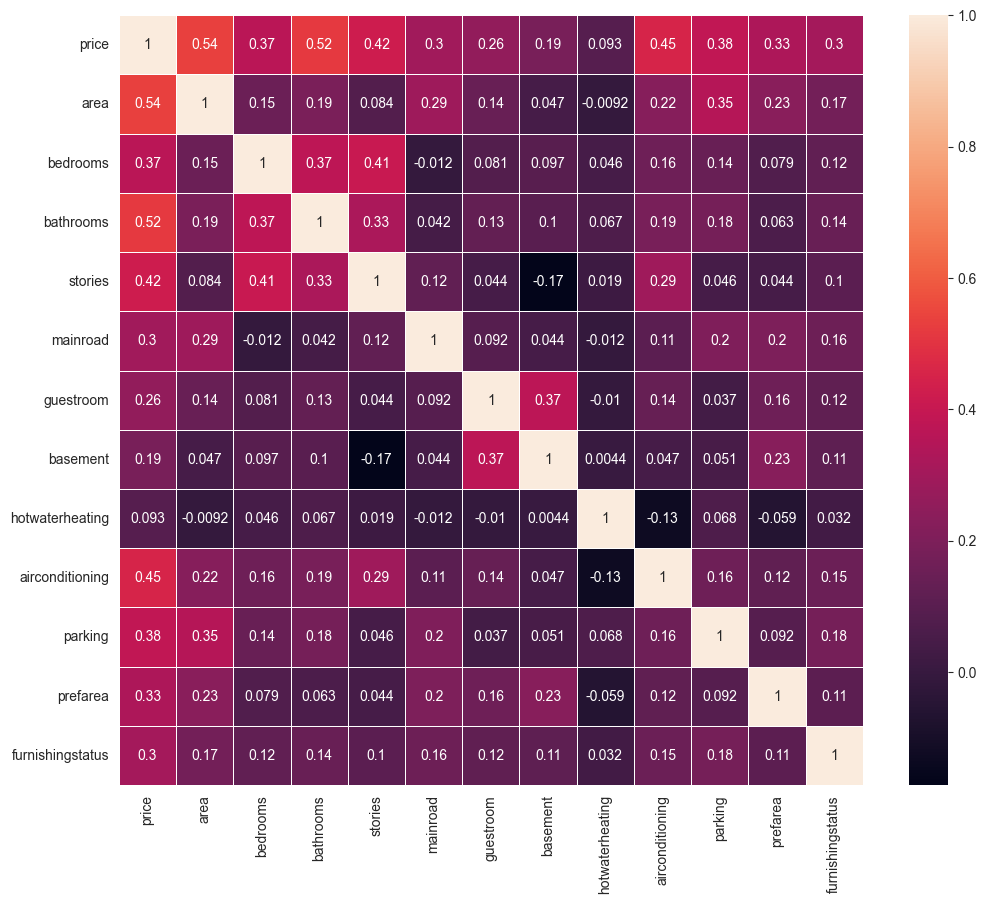

In [413]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, cbar=True)
plt.show()

As it may be noticed, in the context of my dataset, the 3 top features that have the greatest impact on the price of the house are:
* area - the area of the house (.54),
* bathrooms - the number of bathrooms in the house (.52),
* airconditioning - if the house has an air conditioning or not (.45).
and the 3 features that have the least impact on the price of the house are:
* hotwaterheating - if the house has hot water heating or not (.09),
* basement - if the house has a basement or not (.19),
* guestroom - if the house has a guest room or not (.26).

Somewhat, the main assumptions from the beginning were correct, specifically the fact that main criteria for price setting is area of the house, however, the furnishing of the house is in the middle range of the features that influence the price of the house, but still influence the price by increasing it. At the same time, the availability of a parking area around the house also is influencing the price of the house, in a greater manner than the furnishing of the house. At the same time, the fact that house has more rooms, also greatly influence the price of the house, which is logical, since the area of the house is directly proportional to the number of rooms in the house. Whatsoever, the initial assumptions were quite correct, and the analysis of the dataset confirmed them.

Next, I will construct the countplots for each categorical data. A countplot basically counts the categories and returns a count of their occurrences [[7](https://www.geeksforgeeks.org/seaborn-categorical-plots/?ref=ml_lbp)]. This will help me to understand the distribution of the data in the dataset.

<Axes: xlabel='mainroad', ylabel='count'>

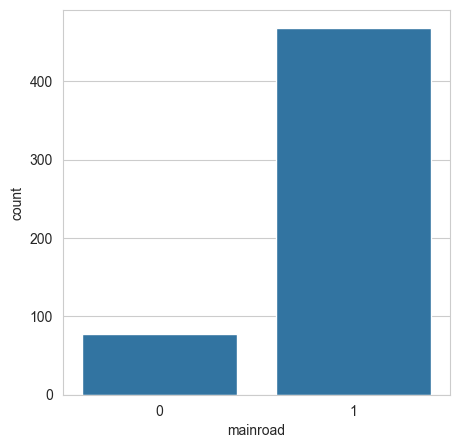

In [414]:
plt.figure(figsize=(5, 5))
sns.countplot(x='mainroad', data=dataset)

<Axes: xlabel='bedrooms', ylabel='count'>

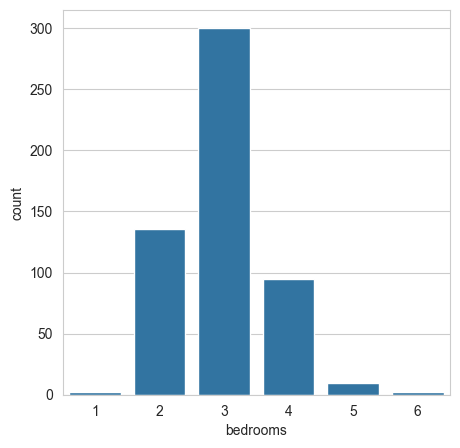

In [415]:
plt.figure(figsize=(5, 5))
sns.countplot(x='bedrooms', data=dataset)

<Axes: xlabel='bathrooms', ylabel='count'>

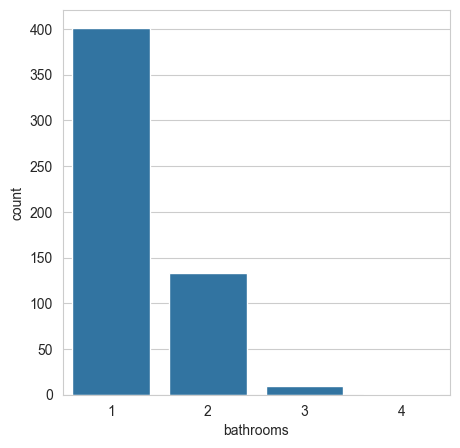

In [416]:
plt.figure(figsize=(5, 5))
sns.countplot(x='bathrooms', data=dataset)

<Axes: xlabel='stories', ylabel='count'>

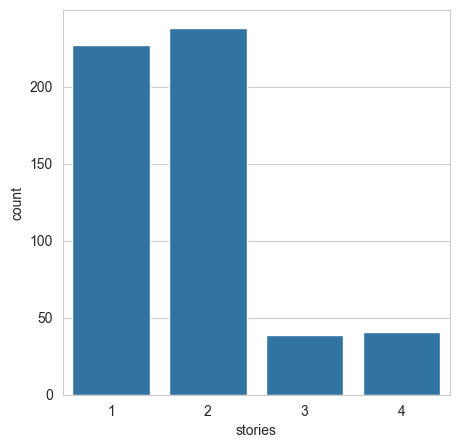

In [417]:
plt.figure(figsize=(5, 5))
sns.countplot(x='stories', data=dataset)

<Axes: xlabel='parking', ylabel='count'>

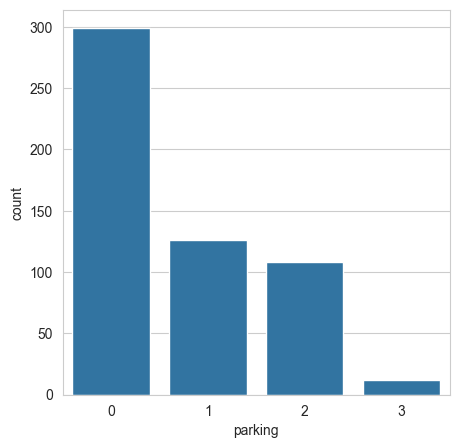

In [418]:
plt.figure(figsize=(5, 5))
sns.countplot(x='parking', data=dataset)

<Axes: xlabel='furnishingstatus', ylabel='count'>

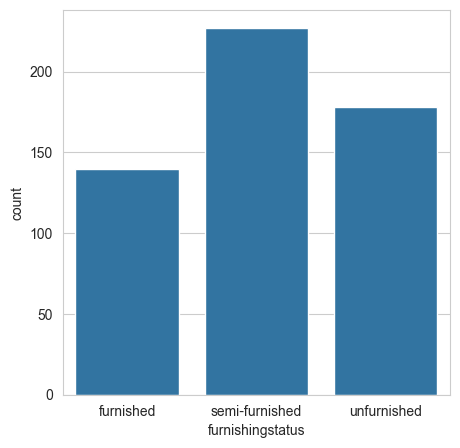

In [419]:
plt.figure(figsize=(5, 5))
sns.countplot(x=dataset["furnishingstatus"].map({0: 'unfurnished', 1: 'semi-furnished', 2: 'furnished'}), data=dataset)

<Axes: xlabel='guestroom', ylabel='count'>

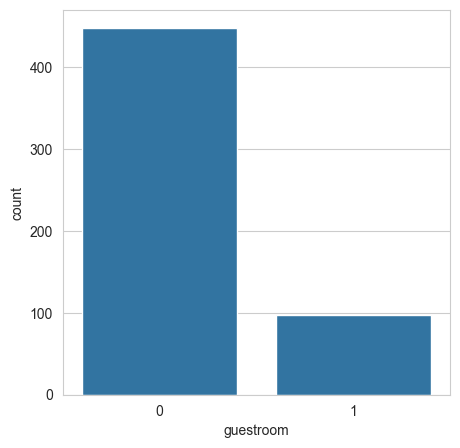

In [420]:
plt.figure(figsize=(5, 5))
sns.countplot(x='guestroom', data=dataset)

<Axes: xlabel='basement', ylabel='count'>

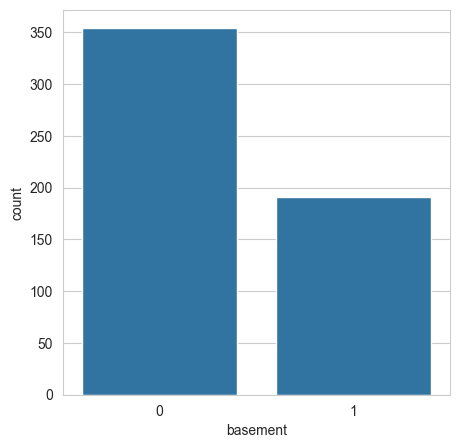

In [421]:
plt.figure(figsize=(5, 5))
sns.countplot(x='basement', data=dataset)

<Axes: xlabel='hotwaterheating', ylabel='count'>

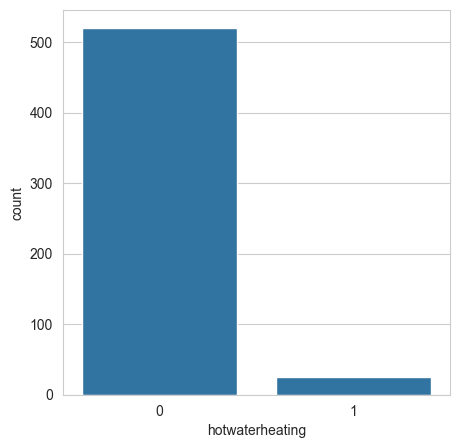

In [422]:
plt.figure(figsize=(5, 5))
sns.countplot(x='hotwaterheating', data=dataset)

<Axes: xlabel='airconditioning', ylabel='count'>

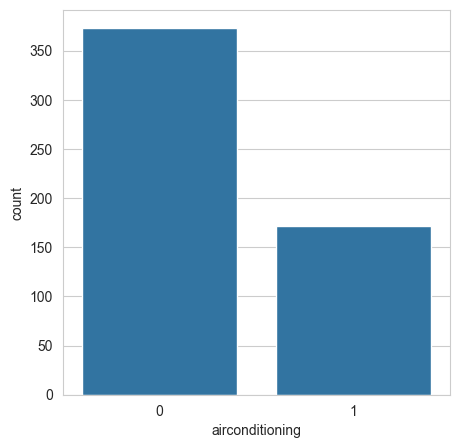

In [423]:
plt.figure(figsize=(5, 5))
sns.countplot(x='airconditioning', data=dataset)

<Axes: xlabel='prefarea', ylabel='count'>

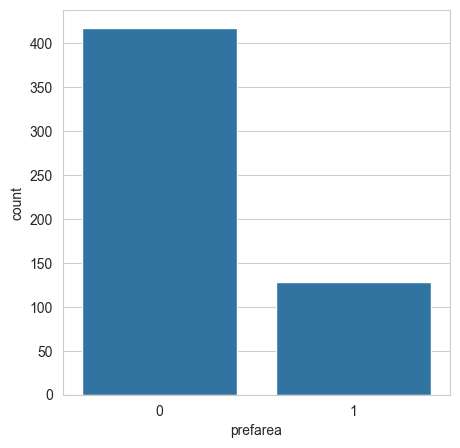

In [424]:
plt.figure(figsize=(5, 5))
sns.countplot(x='prefarea', data=dataset)

As a result of the above plots, I may conclude the following. Most of the houses:
* Are on the **main** road,
* have **3** bedrooms, less likely to have **2** or **4**, and very unlikely to have **1**, **5**, **6** bedrooms,
* have **1** bathroom, less likely to have **2** and very unlikely to have **3** and **4** bathrooms,
* have **2** or **1** story, less likely to have **3** and **4** stories,
* have **no** parking space, less likely to have **1** or **2** parking spaces, and very unlikely to have **3** parking spaces,
* are **semi-furnished**, slightly less likely to be **unfurnished** and less likely to be **furnished**,
* have **no** guest room, less likely to have a guest room,
* have **no** basement, less likely to have a basement,
* have **no** hot water heating, very unlikely to have hot water heating,
* have **no** air conditioning, less likely to have air conditioning,
* are **not** in the preferred area, less likely to be in the preferred area.

Next, I will plot the boxplot for each categorical feature and the price of the house. A boxplot uses boxes and lines to depict the distributions of one or more groups of numeric data. Box limits indicate the range of the central 50% of the data, with a central line marking the median value [[8](https://www.atlassian.com/data/charts/box-plot-complete-guide#:~:text=A%20box%20plot%20(aka%20box,line%20marking%20the%20median%20value.)].

<Axes: xlabel='bedrooms', ylabel='price'>

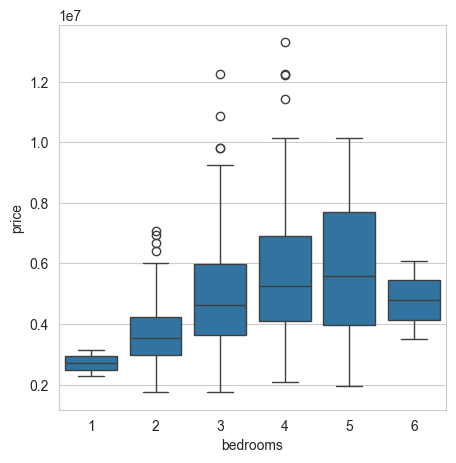

In [425]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='bedrooms', y='price', data=dataset)

<Axes: xlabel='bathrooms', ylabel='price'>

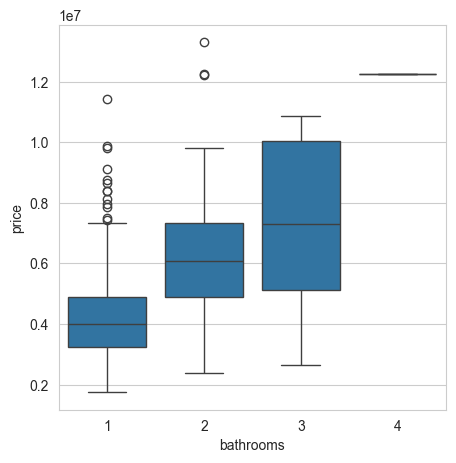

In [426]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='bathrooms', y='price', data=dataset)

<Axes: xlabel='stories', ylabel='price'>

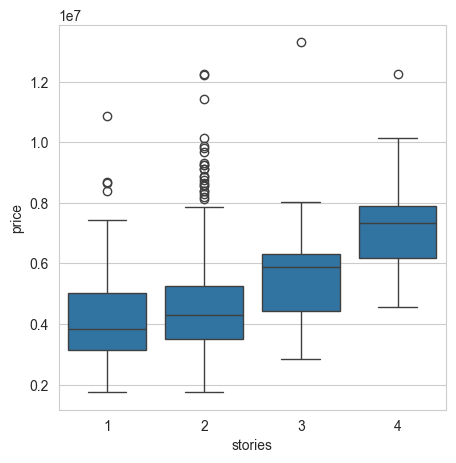

In [427]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='stories', y='price', data=dataset)

<Axes: xlabel='mainroad', ylabel='price'>

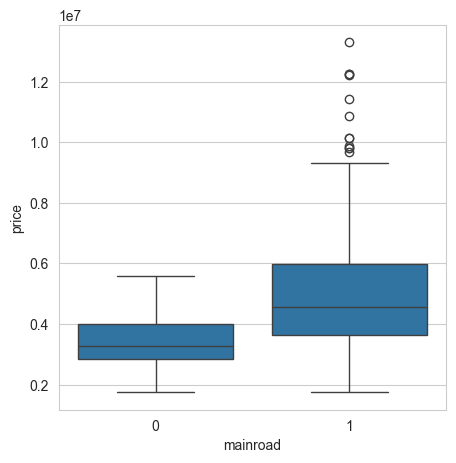

In [428]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='mainroad', y='price', data=dataset)

<Axes: xlabel='guestroom', ylabel='price'>

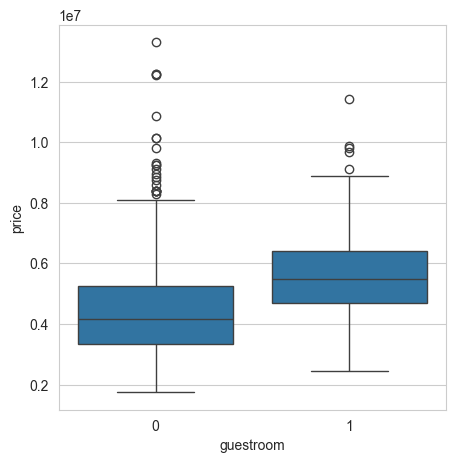

In [429]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='guestroom', y='price', data=dataset)

<Axes: xlabel='basement', ylabel='price'>

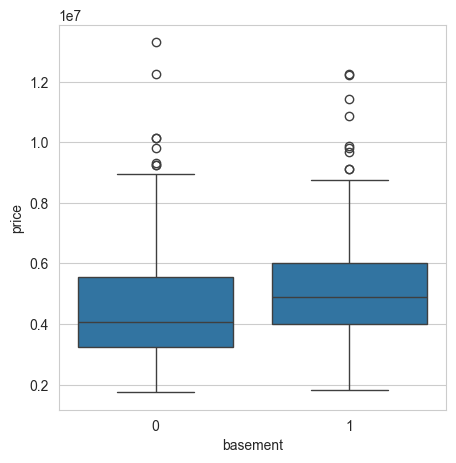

In [430]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='basement', y='price', data=dataset)

<Axes: xlabel='hotwaterheating', ylabel='price'>

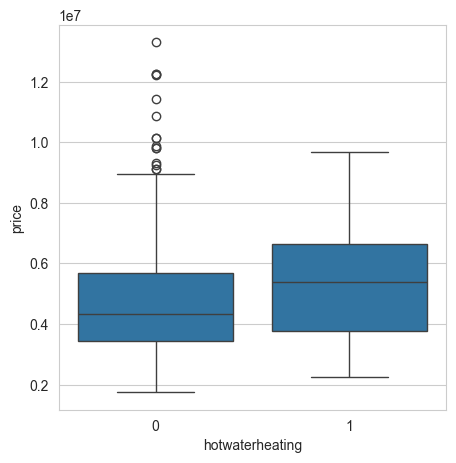

In [431]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='hotwaterheating', y='price', data=dataset)

<Axes: xlabel='airconditioning', ylabel='price'>

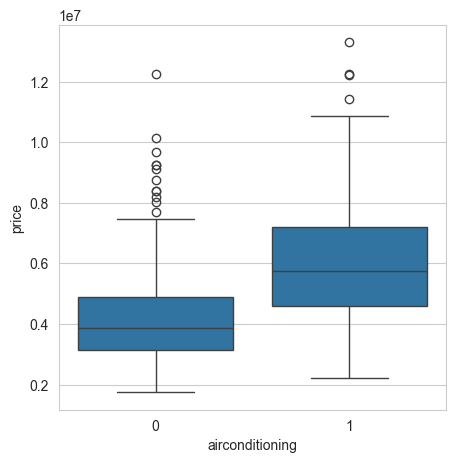

In [432]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='airconditioning', y='price', data=dataset)

<Axes: xlabel='parking', ylabel='price'>

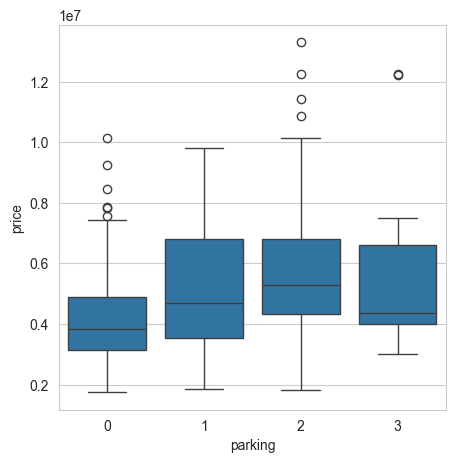

In [433]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='parking', y='price', data=dataset)

<Axes: xlabel='prefarea', ylabel='price'>

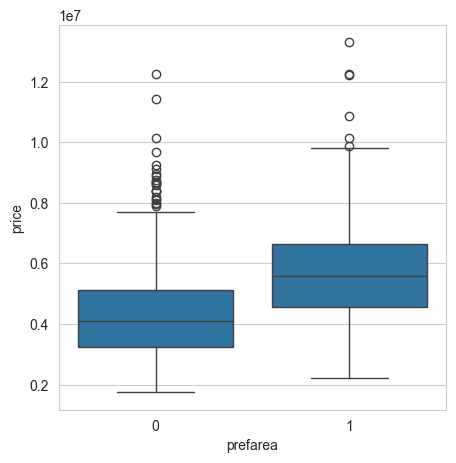

In [434]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='prefarea', y='price', data=dataset)

<Axes: xlabel='furnishingstatus', ylabel='price'>

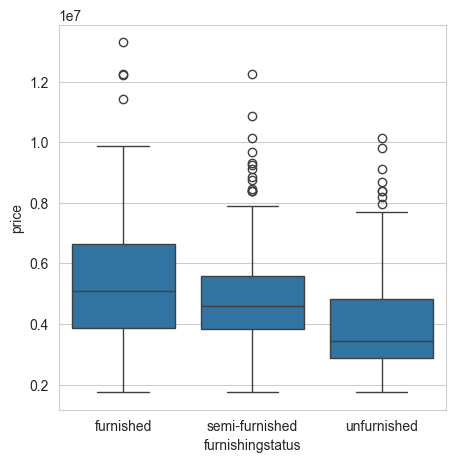

In [435]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=dataset['furnishingstatus'].map({0: 'unfurnished', 1: 'semi-furnished', 2: 'furnished'}), y='price', data=dataset)

From the above boxplots, I can deduce that there are multiple outliers in the dataset for each feature, for example, there are a lot of houses that are semi-furnished and have a price higher than the average price of the house. That fact I will take in consideration in the next step when I will normalize the dataset. However, I observed that mainly the distribution of those outliers still reassemble the general distribution of data based on price, furnished houses are more expensive that unfurnished, and the outliers in this category still reassemble that distribution, which is not really a bad thing, since the model will still be able to learn the general distribution of the data.

Next, I will plot the line plots for each numerical feature. A line chart uses points connected by line segments from left to right to demonstrate changes in value. The horizontal axis depicts a continuous progression, often that of time, while the vertical axis reports values for a metric of interest across that progression [[9](https://www.atlassian.com/data/charts/line-chart-complete-guide)].

<Axes: xlabel='area', ylabel='price'>

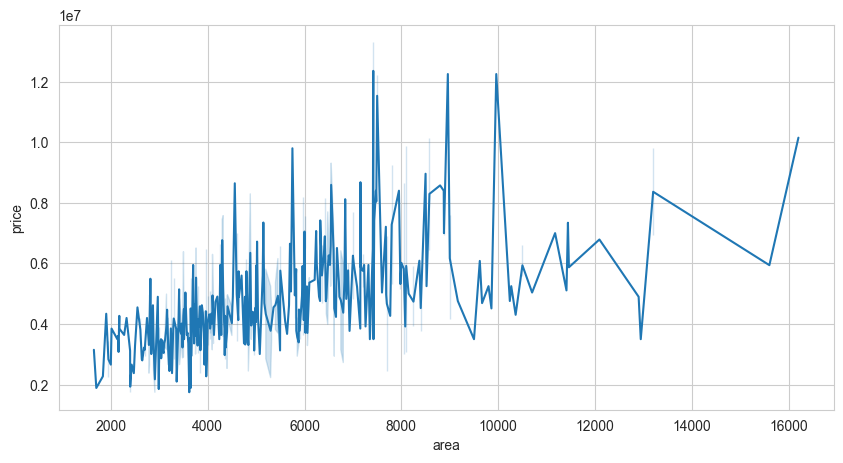

In [436]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='area', y='price', data=dataset)

<Axes: xlabel='area', ylabel='price'>

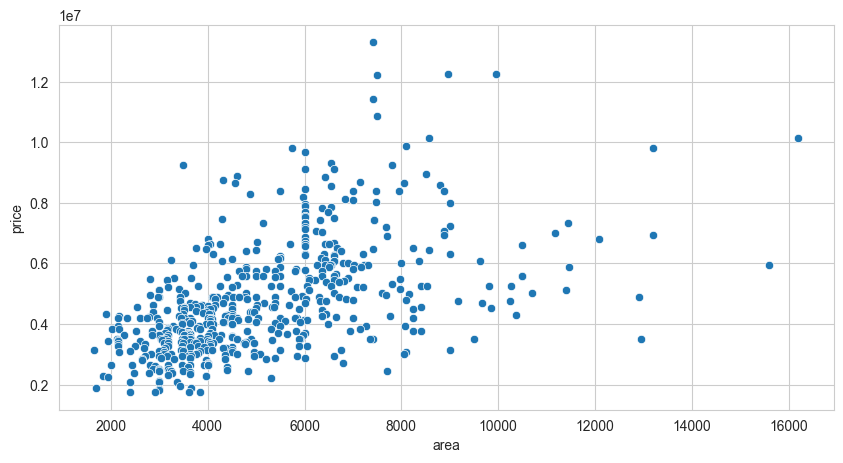

In [437]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset)

From the above plots, I deduce that the price is directly proportional to the area of the house. However, I am also interested in the correspondence with other features of these 2 numerical data. For this, I will use the scatterplot, that will show the relationship between the area and the price of the house, and at the same time, I will use the hue parameter to color the points based on other categorical features, since it may be used generally for the analysis of the relationship between features [[9](https://www.atlassian.com/data/charts/what-is-a-scatter-plot#:~:text=What%20is%20a%20scatter%20plot,to%20observe%20relationships%20between%20variables.)].

<Axes: xlabel='area', ylabel='price'>

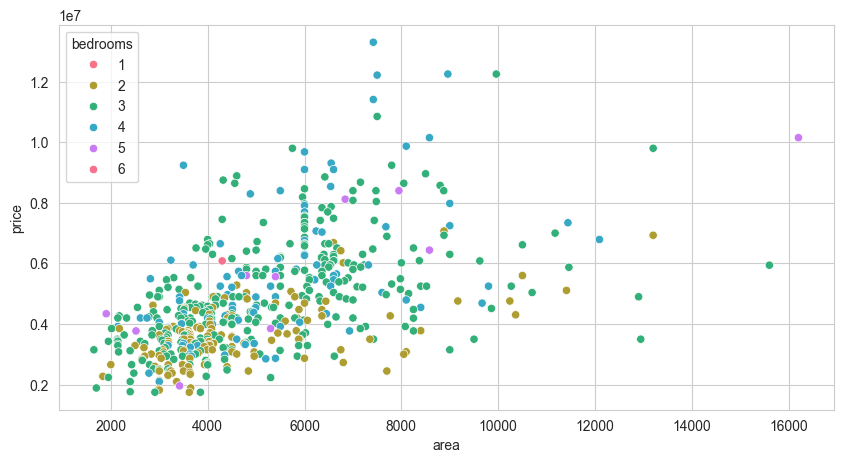

In [438]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='bedrooms', palette='husl')

<Axes: xlabel='area', ylabel='price'>

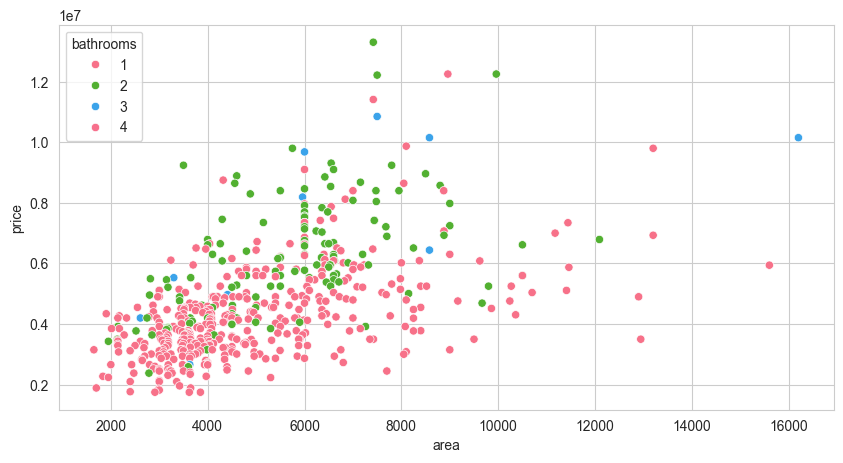

In [439]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='bathrooms', palette='husl')

<Axes: xlabel='area', ylabel='price'>

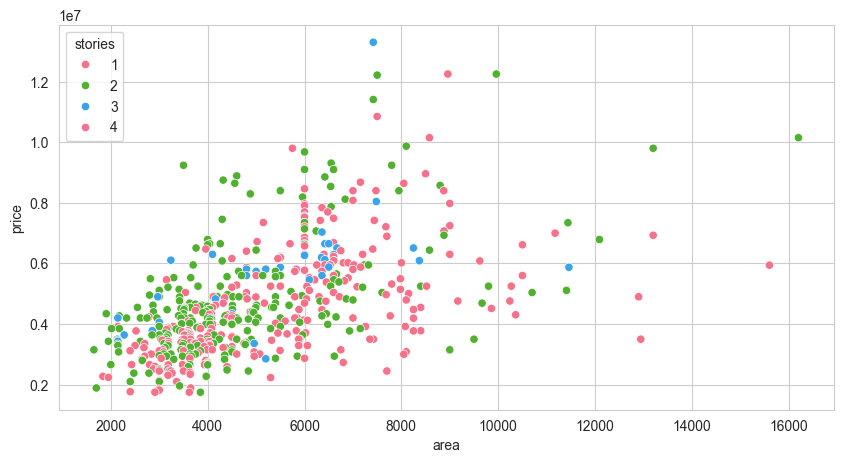

In [440]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='stories', palette='husl')

<Axes: xlabel='area', ylabel='price'>

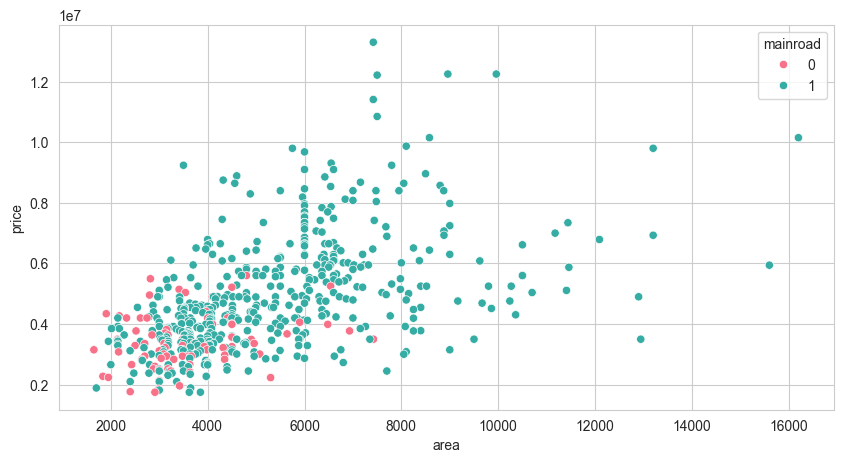

In [441]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='mainroad', palette='husl')

<Axes: xlabel='area', ylabel='price'>

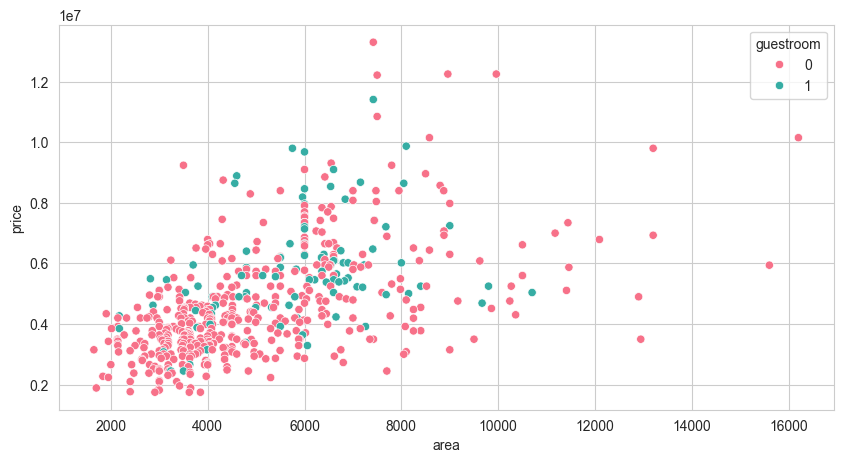

In [442]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='guestroom', palette='husl')

<Axes: xlabel='area', ylabel='price'>

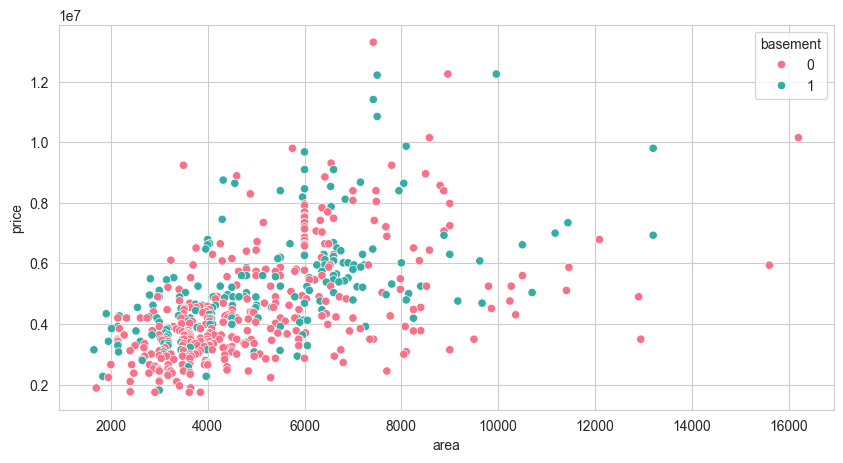

In [443]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='basement', palette='husl')

<Axes: xlabel='area', ylabel='price'>

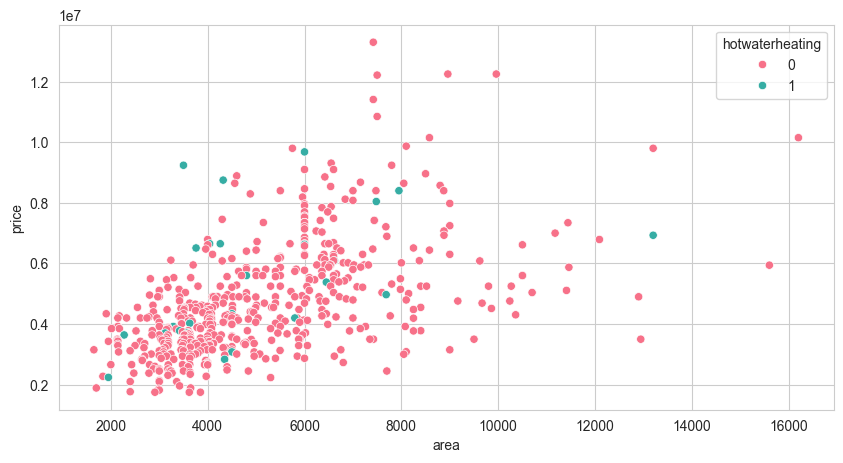

In [444]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='hotwaterheating', palette='husl')

<Axes: xlabel='area', ylabel='price'>

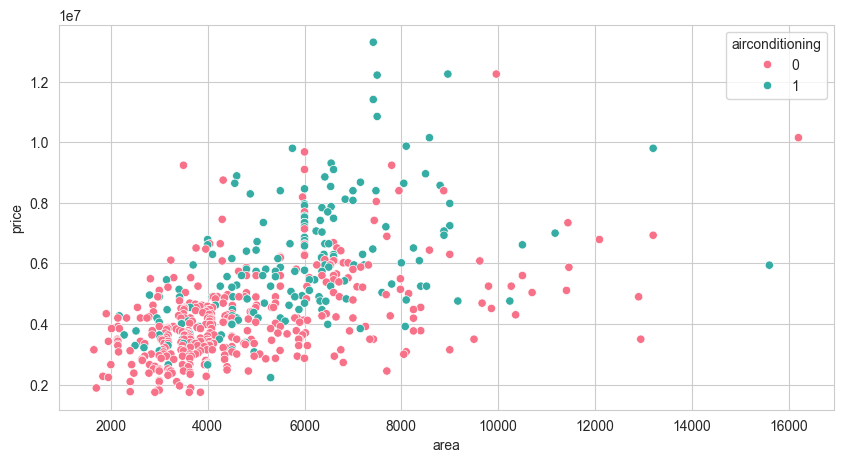

In [445]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='airconditioning', palette='husl')

<Axes: xlabel='area', ylabel='price'>

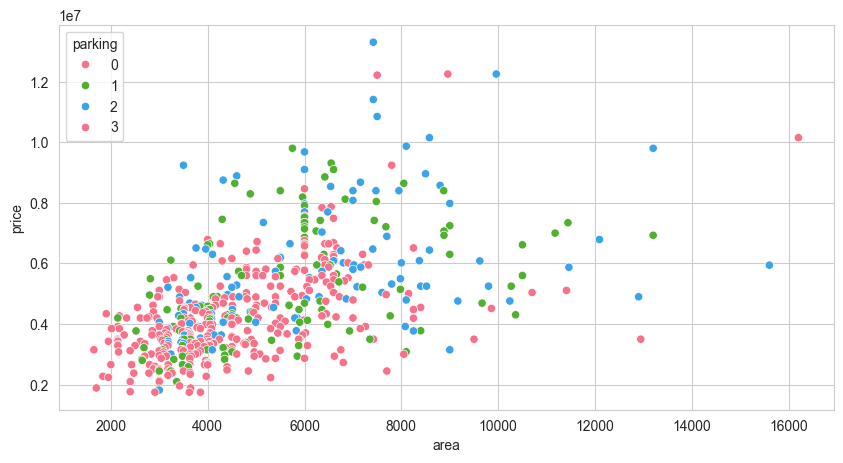

In [446]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='parking', palette='husl')

<Axes: xlabel='area', ylabel='price'>

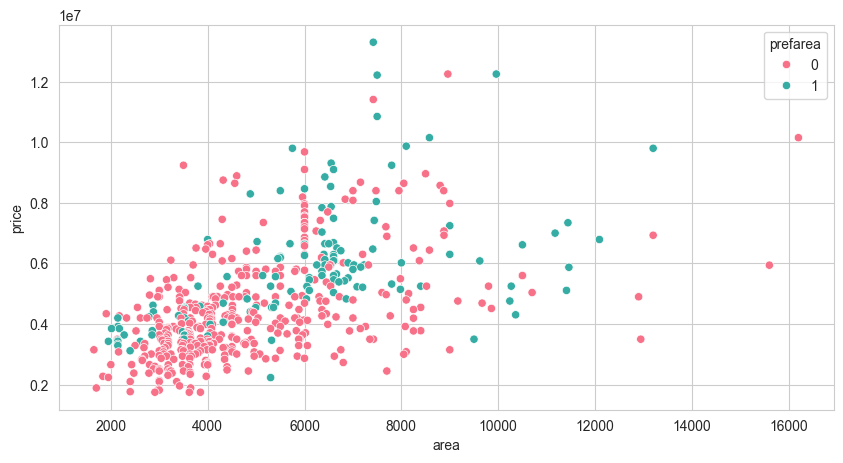

In [447]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue='prefarea', palette='husl')

<Axes: xlabel='area', ylabel='price'>

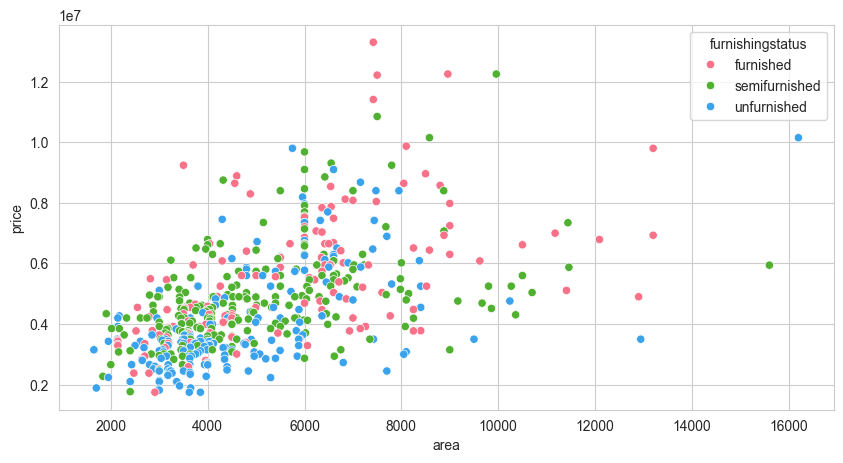

In [448]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='area', y='price', data=dataset, hue=dataset['furnishingstatus'].map({0: "unfurnished", 1: "semifurnished", 2: "furnished"}), palette='husl')

From the above scatterplots, I can deduce the following:
* Houses with greater area and more bedrooms are more expensive,
* Houses with greater area and more bathrooms are **clearly** more expensive, which confirms the correlation matrix,
* Houses with greater area and more stories are not always more expensive. In this case, the stories do not influence so much the price of the house since it has a very low (close to 0) correlation with the area of the house, although it has a relatively high correlation with the price of the house (.42),
* Houses with greater area of the house and that are placed at the main road are more expensive. Also, houses with less area are usually not near the main road. Also, this is not conclusive since there area lot less houses near the main road in the dataset.
* Most of the houses do not have a guestroom. The impact on the price is .26 and on the area - .14, so not a very big influence on the graph as well. However, some houses with guestroom have greater area and price, but taking in count that there are not so much houses with guestroom in the dataset, it is not really conclusive.
* Most of the houses do not have a basement. The impact on the price is .19 and on the area - .047, so not a big influence on the graph, as in the previous case.
* Majority of the houses do not have a hot water heating system, the influence on the price is minor - .093 and on the area is also appreciatively close to 0 - -.0092. Therefore, this feature will not affect the price practically at all and will not be a very useful feature in the model training.
* Houses with air conditioning are more pricey, the impact on the price and area are both relatively high (on price - .45 and on area - .22). I suppose its due to the fact that houses with greater area are in more need of air conditioning in order to maintain a stable temperature in the whole building.
* Houses with at least 1 parking spot are more expensive than without parking area. Also, the impact on the price is high - .38, and on the area is also high - .35. Even though the data about houses without a parking spot are more than with parking spot(s), it suggests that the parking spot also plays a role in the price of the house.
* Houses in preferred areas are more expensive, that placement of the house in a preferred area has an influence of .33 on the price and on the area - .23, I assume this is because preferred areas are somewhere that permits houses with more area and access to main road.
* Houses that are furnished are more expensive.

### Step 3.4 - Normalization of the dataset



For the start, I need to separate the dataset into features and target values, in conformity with the previously defined relationship:
$$
\begin{split}
m = 545 \\
|\vec{X}| = 12 \text{ (for a single training example)}\\
|\vec{Y}| = 1 \text{ (for a single training example)}\\
\end{split}
$$

In [449]:
X_features = dataset.drop('price', axis=1)
X_features

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [450]:
y_target = dataset['price']
y_target

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

Then, I need to split both new datasets into the following groups of sets:
* **Training Set** - used to train the model
* **Cross Validation Set** - used to evaluate the different model configurations you are choosing from. For example, you can use this to make a decision on what polynomial features to add to your dataset. In this case, I will try different Polynomial Regression configurations.
* **Test Set** - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions while you are still developing the models.

However, in this case, since I want to use a Linear Regression Model, and I do not aim to test different models and check what model suits better, I will just use Training set and Test set.


In [451]:

# X_train, X_rest, y_train, y_rest = train_test_split(X_features, y_target, test_size=0.4, random_state=1)
# X_cv, X_test, y_cv, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=1)
# del X_rest, y_rest

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=1)

In [452]:
X_train.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
180,4500,4,2,1,0,0,1,0,1,2,0,1
189,3540,2,1,1,0,1,1,0,0,0,0,1
93,7200,3,2,1,1,0,1,0,1,3,0,1
444,3120,3,1,2,0,0,0,0,0,0,0,2
81,4000,3,2,2,1,0,1,0,1,1,0,1


In [453]:
y_train.head(5)

180    5215000
189    5040000
93     6300000
444    3220000
81     6615000
Name: price, dtype: int64

In [454]:
# X_cv.head(5)

In [455]:
# y_cv.head(5)

In [456]:
X_test.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,6240,4,2,2,1,0,0,0,1,1,0,2
247,8400,4,1,4,1,0,0,0,0,3,0,0
142,10500,4,2,2,1,0,0,0,0,1,0,1
107,6420,3,1,3,1,0,1,0,0,0,1,0
483,6615,3,1,2,1,0,0,0,0,0,0,1


In [457]:
y_test.head(5)

62     7070000
247    4550000
142    5600000
107    6125000
483    2940000
Name: price, dtype: int64

In the next step, I will perform the normalization/scaling the features. I decided to use the Z-Score normalization - the process of normalizing every value in a dataset such that the mean of all the values is 0 and the standard deviation is 1 [[10](https://www.statology.org/z-score-normalization/#:~:text=Z%2Dscore%20normalization%20refers%20to,the%20standard%20deviation%20is%201.&text=where%3A,%CE%BC%3A%20Mean%20of%20data)]:
$$
\begin{split}
Z = \frac{x_i - \mu_i}{\sigma_i} \text{, i = }i^{th}\text{ training example} \\
\mu_j = \frac{1}{m}\displaystyle\sum_{i=1}^m x_j^{(i)} \\
\sigma_j = \frac{1}{m}\displaystyle\sum_{i=1}^m (x_j^{(i)} - \mu_j)^2
\end{split}
$$
In this case, Z-Score normalization operates on the 2 main concepts:
* Mean - a quantity representing the "center" of a collection of numbers and is intermediate to the extreme values of the set of numbers [[11](https://en.wikipedia.org/wiki/Mean)].
* Standard deviation - in statistics, the standard deviation is a measure of the amount of variation of the values of a variable about its mean [[12](https://en.wikipedia.org/wiki/Standard_deviation)].

In [458]:
# y_train_reshaped = y_train.values.reshape(-1, 1)
# y_train_reshaped

In [459]:
# y_test_reshaped = y_test.values.reshape(-1, 1)
# y_test_reshaped

In [460]:
# from sklearn.preprocessing import StandardScaler
# y_standard_scaler = StandardScaler()
#
# y_train_scaled = y_standard_scaler.fit_transform(y_train_reshaped)
# y_test_scaled = y_standard_scaler.transform(y_test_reshaped)

In [461]:
# pd.DataFrame(y_train_scaled, columns=["price"])

In [462]:
# pd.DataFrame(y_train_scaled, columns=["price"]).describe()

In [463]:
# pd.DataFrame(y_test_scaled, columns=["price"])

In [464]:
# pd.DataFrame(y_test_scaled, columns=["price"]).describe()

In [465]:
X_standard_scaler = MinMaxScaler()
X_train_scaled = X_standard_scaler.fit_transform(X_train)
X_test_scaled = X_standard_scaler.transform(X_test)

In [466]:
column_names = X_train.columns
pd.DataFrame(X_train_scaled, columns=column_names)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.193103,0.6,0.333333,0.000000,0.0,0.0,1.0,0.0,1.0,0.666667,0.0,0.5
1,0.126897,0.2,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.5
2,0.379310,0.4,0.333333,0.000000,1.0,0.0,1.0,0.0,1.0,1.000000,0.0,0.5
3,0.097931,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
4,0.158621,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.673103,0.4,0.000000,0.666667,1.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.5
377,0.206897,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,1.0
378,0.228966,0.4,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0
379,0.274483,0.4,0.000000,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.5


In [467]:
pd.DataFrame(X_train_scaled, columns=column_names).describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.243674,0.398425,0.097988,0.261592,0.855643,0.170604,0.356955,0.047244,0.296588,0.229221,0.246719,0.473753
std,0.154932,0.152514,0.168478,0.282197,0.351913,0.376657,0.479731,0.212440,0.457354,0.288083,0.431669,0.377797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133103,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.324138,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [468]:
column_names = X_test.columns
pd.DataFrame(X_test_scaled, columns=column_names)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.313103,0.6,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,1.0
1,0.462069,0.6,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
2,0.606897,0.6,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.5
3,0.325517,0.4,0.000000,0.666667,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0
4,0.338966,0.4,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.120690,0.4,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.5
160,0.132414,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
161,0.158621,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
162,0.296552,0.4,0.000000,0.333333,1.0,0.0,0.0,1.0,0.0,0.333333,1.0,0.5


In [469]:
pd.DataFrame(X_test_scaled, columns=column_names).describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.224713,0.380488,0.089431,0.284553,0.865854,0.195122,0.335366,0.042683,0.359756,0.235772,0.207317,0.445122
std,0.136177,0.135156,0.165528,0.305022,0.341853,0.397508,0.473564,0.202760,0.481399,0.285948,0.406626,0.387742
min,-0.003448,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.124655,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.190000,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.314500,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,0.625000
max,0.793103,0.800000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As it may be noticed, in the above description of the dataframe that is scaled, the mean value is close to 0, and the standard deviation is close to 1, which is expected from the Z-Score Normalization.

In the next step, I am using Scikit-Learn Linear Regression model, that will be trained on my X_train_scaled and y_train values in order to obtain a model that has a set of weights for each feature and that will be able to predict new prices.

In [470]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

For test purposes, I will be using Mean Squared Error formula from Scikit-Learn library:
$$
\begin{split}
MSE = \frac{1}{m}\displaystyle\sum_{i=1}^m (y_i - \hat{y}_i)^2
\end{split}
$$
MSE will measure the average of the squares of the errors [[13](https://en.wikipedia.org/wiki/Mean_squared_error)],
and R2 score, that will show the accuracy of your model on a percentage scale [[14](https://www.freecodecamp.org/news/evaluation-metrics-for-regression-problems-machine-learning/)]:
$$
\begin{split}
R^2 = 1 - \frac{RSS}{TSS} \text{, where:} \\
R^2\text{ - coefficient of determination,} \\
RSS\text{ - sum of squares of residuals,} \\
TSS\text{ - total sum of square,} \\
RSS = \displaystyle\sum_{i=1}^m (y_i - \hat{y}_i)^2 \\
TSS = \displaystyle\sum_{i=1}^m (y_i - \bar{y})^2 \\
y_i \text{ - the actual value,} \\
\hat{y}_i \text{ - the predicted value,} \\
\bar{y}_i \text{ - the mean value of the variable} \\
\end{split}
$$

In [471]:
yhat_training = linear_model.predict(X_train_scaled)
# print(f"Training MSE: {mean_squared_error(y_standard_scaler.inverse_transform(y_train_scaled), y_standard_scaler.inverse_transform(yhat_training)) / 2}")
# print(f"Training R2 Score: {r2_score(y_standard_scaler.inverse_transform(y_train_scaled), y_standard_scaler.inverse_transform(yhat_training))}")

print(f"Training MSE: {mean_squared_error(y_train, yhat_training) / 2}")
print(f"Training R2 Score: {r2_score(y_train, yhat_training)}")


Training MSE: 518925582335.4612
Training R2 Score: 0.6799674103626108


In [472]:
yhat_test = linear_model.predict(X_test_scaled)
# print(f"Test MSE: {mean_squared_error(y_standard_scaler.inverse_transform(y_test_scaled), y_standard_scaler.inverse_transform(yhat_test)) / 2}")
# print(f"Test R2 Score: {r2_score(y_standard_scaler.inverse_transform(y_test_scaled), y_standard_scaler.inverse_transform(yhat_test))}")

print(f"Test MSE: {mean_squared_error(y_test, yhat_test) / 2}")
print(f"Test R2 Score: {r2_score(y_test, yhat_test)}")

Test MSE: 687664896776.5663
Test R2 Score: 0.6621173401969203


As it may be noticed from the above outputs, the accuracy of the model on training set is:
$$
R_{training}^2 \approx 68 \%
$$
and on the test set:
$$
R_{test}^2 \approx 66 \%
$$

That is not a very good result, but since I am not so proficient in Machine Learning field, I can say that I tried my best to understand fully the problem I had.

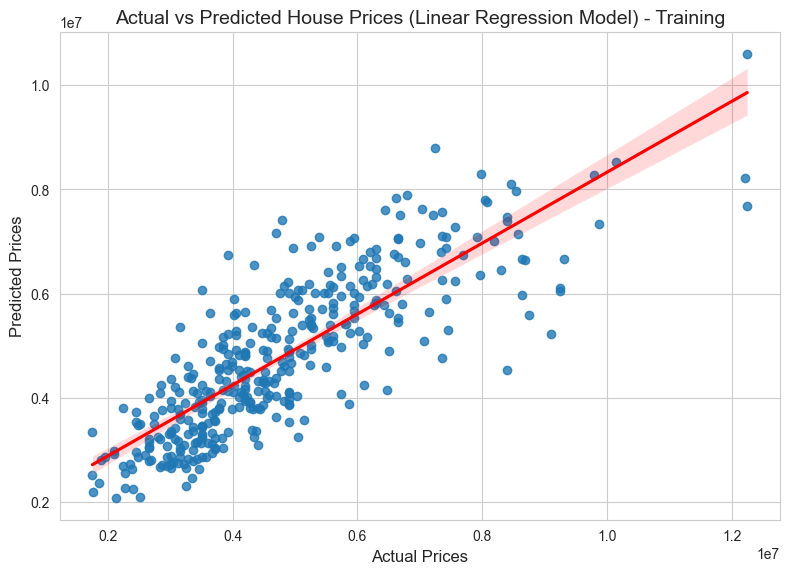

In [473]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train, y=yhat_training, line_kws={'color':'r'})
plt.title('Actual vs Predicted House Prices (Linear Regression Model) - Training', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.tight_layout()
plt.show()

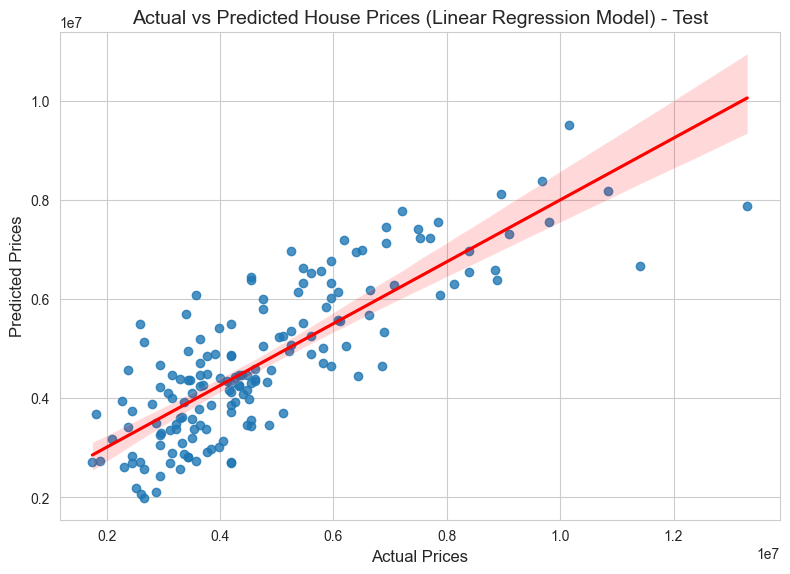

In [474]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=yhat_test, line_kws={'color':'r'})
plt.title('Actual vs Predicted House Prices (Linear Regression Model) - Test', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.tight_layout()
plt.show()

In [475]:
coefficients = linear_model.coef_
intercept = linear_model.intercept_

fitted_function_parts = [f"{coefficient} * {feature}" for coefficient, feature in zip(coefficients, X_features.columns)]
fitted_equation = " + ".join(fitted_function_parts)

print(f"Fitted equation: y = {intercept} + " + fitted_equation)

Fitted equation: y = 1720448.0289697219 + 3572041.4631314613 * area + 235994.3136255322 * bedrooms + 3060519.72972627 * bathrooms + 1577336.8900554231 * stories + 476712.98481254204 * mainroad + 275668.9507600057 * guestroom + 557956.2675518387 * basement + 822714.5575357171 * hotwaterheating + 608777.0120531 * airconditioning + 824209.3499264843 * parking + 500668.0329551726 * prefarea + 404925.3398917678 * furnishingstatus


The obtained function is the following:
$$
\begin{equation}
y = 1720448.0289697219 + 3572041.4631314613 * \text{area} + 235994.3136255322 * \text{bedrooms} + 3060519.72972627 * \text{bathrooms} + 1577336.8900554231 * \text{stories} + 476712.98481254204 * \text{mainroad} + 275668.9507600057 * \text{guestroom} + 557956.2675518387 * \text{basement} + 822714.5575357171 * \text{hotwaterheating} + 608777.0120531 * \text{airconditioning} + 824209.3499264843 * \text{parking} + 500668.0329551726 * \text{prefarea} + 404925.3398917678 * \text{furnishingstatus}
\end{equation}
$$

At the final of this task, I can conclude that I tried to adhere to general practices when it comes to training a Linear Regression Machine Learning Model, alongside with the feature scaling and dataset analysis. However, I think that there are a lot of mistakes I made due to my lack of knowledge the domain and I look forward to new knowledge so that I can optimize the models in the future.